### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os 

In [3]:
# Check current directory
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'Walmart Sale Analysis.ipynb',
 'Walmart_Store_sales.csv']

### Import Data

In [90]:
df = pd.read_csv('Walmart_Store_sales.csv')

# Create a copy of original dataset
df2 = df.copy()

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Understanding Data

In [91]:
# Checking for basic attribute of each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


* There are not missing values in the Dataset
* Only Column Date is not currently in the accurate data type

In [92]:
df2.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


***Holiday Events***

* __Super Bowl__: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

* __Labor Day__: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

* __Thanksgiving__: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

* __Christmas__: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [148]:
df2.loc[(df2['Holiday_Flag']==1)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,9,2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,11,2011
...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,9,2011
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,11,2011
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,12,2011
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2,2012


* As can be seen, the Date column of Holiday sales are mostly the Holiday Date itself. However, there are some observations in which the date and month is switched such as the value at index 6427. The correct value should be 2012-09-07 which is Labor Day in 2012

In [151]:
df2.loc[(df2['Holiday_Flag']==1)]['Date'].unique()

array(['2010-12-02T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

* There are some weird data in the Date column of Holiday Sales. 2010-12-02 and 2011-11-02 are not Holiday Date. They seems to be the reversed version of the Super Bowl in 2010 and 2011

### Data Preperation

##### Convert Data Type

In [101]:
# Convert Date column to Datetime Data
df2['Date']=pd.to_datetime(df2['Date'])

##### Breakout Date Column

In [102]:
# Add Column Month
df2['Month'] = df2['Date'].dt.month

# Add Column Year
df2['Year'] = df2['Date'].dt.year

df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


##### Fixing Holiday Date Error

In [103]:
# Check for Holiday Date Error
df2.loc[(df2['Holiday_Flag']==1) & (~df2['Month'].isin((2,9,11,12)))]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,10,2010
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,10,2012
135,1,2012-07-09,1661767.33,1,83.96,3.730,222.439015,6.908,7,2012
174,2,2010-10-09,1839128.83,1,79.09,2.565,211.153210,8.099,10,2010
248,2,2012-10-02,2103322.68,1,46.98,3.409,219.904907,7.057,10,2012
...,...,...,...,...,...,...,...,...,...,...
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,10,2012
6284,44,2012-07-09,338737.33,1,70.65,3.689,130.932548,5.407,7,2012
6323,45,2010-10-09,721460.22,1,70.87,2.699,182.598178,8.743,10,2010
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,10,2012


* There are 135 error rows in total. Therefore, Fixing these data cannot be done mannually 

In [104]:
# Define a Function for switch Date and Month
def SwitchDateAndMonth(x):
    x = dt.datetime.strptime(dt.datetime.strftime(x,'%Y-%d-%m'),'%Y-%m-%d')
    return x

In [105]:
# Apply SwitchDateAndMonth Function
df2.loc[(df2['Holiday_Flag']==1) & (~df2['Month'].isin((2,9,11,12))),'Date'] = df2.loc[(df2['Holiday_Flag']==1) & (~df2['Month'].isin((2,9,11,12))),'Date'].apply(SwitchDateAndMonth).copy(deep=False)

In [107]:
df2.loc[df2['Holiday_Flag']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,10,2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,11,2011
...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,9,2011
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,11,2011
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,12,2011
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,10,2012


In [108]:
# Fix the Month Column
df2['Month'] = df2['Date'].dt.month

In [111]:
df2.loc[(df2['Holiday_Flag']==1) & (~df2['Month'].isin((2,9,11,12)))]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year


* All Holiday Date Errors have been fixed

##### Fixing Super Bowl Error Date

In [153]:
# 2010-12-02 and 2011-11-02 a
ErrorSuperBowl = [dt.datetime(2010,12,2),dt.datetime(2011,11,2)]
df2.loc[(df2['Holiday_Flag']==1) & (df2['Date'].isin(ErrorSuperBowl)),'Date'] = df2.loc[(df2['Holiday_Flag']==1) & (df2['Date'].isin(ErrorSuperBowl)),'Date'].apply(SwitchDateAndMonth).copy(deep=False)
df2.loc[(df2['Holiday_Flag']==1) & (df2['Date'].isin(ErrorSuperBowl)),'Date']

Series([], Name: Date, dtype: datetime64[ns])

### Descriptive Analysis

#### QUESTION 1 : Which store has maximum sales in this dataset?

##### Maximum Annual Sales

In [154]:
df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


In [155]:
AnnualSale = df2.groupby(['Store'])['Weekly_Sales'].sum().rename('Total Sale').reset_index()
AnnualSale.loc[AnnualSale['Total Sale']==AnnualSale['Total Sale'].max()]

,Store,Total Sale
19,20,3.013978e+08


##### Maximum Weekly Sales

In [156]:
df2.loc[df2['Weekly_Sales']==df2['Weekly_Sales'].max()][['Store','Date','Weekly_Sales']]

,Store,Date,Weekly_Sales
1905,14,2010-12-24,3818686.45


#### QUESTION 2 : Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of variance (C0V)

In [157]:
# Find std and mean of Weekly_Sales for each store
STD_Data = df2.groupby(['Store'])['Weekly_Sales'].agg(['std','mean']).reset_index()

# Create Coefficient of Variance column by dividing std over mean
STD_Data['CoV'] = STD_Data['std']*100/STD_Data['mean']

# Filtering store with the max std
STD_Data.loc[STD_Data['std']==STD_Data['std'].max()]

,Store,std,mean,CoV
13,14,317569.949476,2.020978e+06,15.713674


#### QUESTION 3 : Which store/s has good quarterly growth rate in Q3’2012.

In [158]:
df2.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,12,2010
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,3,2010
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,3,2010
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2,2010
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,9,2010


In [159]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
 9   Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 502.9 KB


In [160]:
# Get all data in Q3 of 2012
Q3_Data = df2.loc[(df2['Year']==2012) & (df2['Month'].isin([7,8,9]))]

# Get all data in Q2 of 2012
Q2_Data = df2.loc[(df2['Year']==2012) & (df2['Month'].isin([4,5,6]))]

# Find the total Quarterly sale of each store in Q3 and Q2
Q3_Total_Sale = Q3_Data.groupby(['Store'])['Weekly_Sales'].sum().rename('Q3 Total Sale').reset_index()
Q2_Total_Sale = Q2_Data.groupby(['Store'])['Weekly_Sales'].sum().rename('Q2 Total Sale').reset_index()

# Merge two Quarterly Sale Dataset together
Merged = pd.merge(Q2_Total_Sale,Q3_Total_Sale,how='inner',on='Store')

# Calculate and Add the Growth Column
Merged['Growth Rate'] = np.round((Merged['Q3 Total Sale']-Merged['Q2 Total Sale'])/Merged['Q2 Total Sale'],2)

In [161]:
Merged.head()

,Store,Q2 Total Sale,Q3 Total Sale,Growth Rate
0,1,21036965.58,18633209.98,-0.11
1,2,25085123.61,22396867.61,-0.11
2,3,5562668.16,4966495.93,-0.11
3,4,28384185.16,25652119.35,-0.10
4,5,4427262.21,3880621.88,-0.12


In [162]:
# Find store that has the best Growth Rate
Merged.loc[Merged['Growth Rate']==Merged['Growth Rate'].max()]

,Store,Q2 Total Sale,Q3 Total Sale,Growth Rate
15,16,6626133.44,6441311.11,-0.03


In [163]:
# Find the store that has the biggest lost
Merged.loc[Merged['Growth Rate']==Merged['Growth Rate'].min()]

,Store,Q2 Total Sale,Q3 Total Sale,Growth Rate
13,14,24427769.06,20140430.4,-0.18


#### QUESTION 4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

##### 1. Find the Mean Sales in Non-Holiday Season

In [164]:
# Create Data Table of NonHolidaySale
NonHolidayData = df2.loc[df2['Holiday_Flag']==0].reset_index(drop=True)
NonHolidayData

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
2,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
3,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
4,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,12,2010
...,...,...,...,...,...,...,...,...,...,...
5980,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
5981,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
5982,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
5983,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [185]:
# Find the mean of Weekly Sales of each year
NonHolidayYearly = NonHolidayData.groupby(['Year'])['Weekly_Sales'].agg('mean').rename('NonHoliday Avg Sale').reset_index()
NonHolidayYearly

,Year,NonHoliday Avg Sale
0,2010,1.054880e+06
1,2011,1.037715e+06
2,2012,1.030782e+06


In [186]:
# Find the mean of Weekly Sales overall
NonHolidayData['Weekly_Sales'].mean()

1041256.3802088564

##### 2. Find the mean of Holiday Sale

In [167]:
# Create Data Table of all Holiday Sale
HolidayData = df2.loc[df2['Holiday_Flag']==1].reset_index(drop=True)
HolidayData

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
1,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,9,2010
2,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010
3,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010
4,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,11,2011
...,...,...,...,...,...,...,...,...,...,...
445,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,9,2011
446,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,11,2011
447,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,12,2011
448,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2,2012


In [168]:
# Create list of Holiday for each event
SuperBowl = [dt.datetime(2010,2,12),dt.datetime(2011,2,11),dt.datetime(2012,2,10),dt.datetime(2013,2,8)]
LaborDay = [dt.datetime(2010,9,10),dt.datetime(2011,9,9),dt.datetime(2012,9,7),dt.datetime(2013,9,6)]
Thanksgiving = [dt.datetime(2010,11,26),dt.datetime(2011,11,25),dt.datetime(2012,11,23),dt.datetime(2013,11,29)]
Christmas = [dt.datetime(2010,12,31),dt.datetime(2011,12,30),dt.datetime(2012,12,28),dt.datetime(2013,12,27)]

# Create Column 'Holiday'
Holiday = []

for i in HolidayData['Date']:
    if i in SuperBowl:
        Holiday.append('Super Bowl')
    elif i in LaborDay:
        Holiday.append('Labor Day')
    elif i in Thanksgiving:
        Holiday.append('Thanksgiving')
    elif i in Christmas:
        Holiday.append('Christmas')

In [175]:
# Create Holiday Column
HolidayData['Holiday'] = Holiday
HolidayData

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Holiday
0,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,Super Bowl
1,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,9,2010,Labor Day
2,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,11,2010,Thanksgiving
3,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010,Christmas
4,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,11,2011,Super Bowl
...,...,...,...,...,...,...,...,...,...,...,...
445,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,9,2011,Labor Day
446,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,11,2011,Thanksgiving
447,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,12,2011,Christmas
448,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2,2012,Super Bowl


In [196]:
# Find the mean sale of each Holiday in each year
HolidayYearly = HolidayData.groupby(['Year','Holiday'])['Weekly_Sales'].mean().rename('Holiday Avg Sale').reset_index()
HolidayYearly

,Year,Holiday,Holiday Avg Sale
0,2010,Christmas,8.985004e+05
1,2010,Labor Day,1.014098e+06
2,2010,Super Bowl,1.074148e+06
3,2010,Thanksgiving,1.462689e+06
4,2011,Christmas,1.023166e+06
5,2011,Labor Day,1.039183e+06
6,2011,Super Bowl,1.051915e+06
7,2011,Thanksgiving,1.479858e+06
8,2012,Labor Day,1.074001e+06
9,2012,Super Bowl,1.111320e+06


In [191]:
# Merge Nonholiday Yearly to Holiday Yearly
df3 = pd.merge(HolidayYearly,NonHolidayYearly,how='inner',on='Year')
df3

,Year,Holiday,Holiday Avg Sale,NonHoliday Avg Sale
0,2010,Christmas,8.985004e+05,1.054880e+06
1,2010,Labor Day,1.014098e+06,1.054880e+06
2,2010,Super Bowl,1.074148e+06,1.054880e+06
3,2010,Thanksgiving,1.462689e+06,1.054880e+06
4,2011,Christmas,1.023166e+06,1.037715e+06
5,2011,Labor Day,1.039183e+06,1.037715e+06
6,2011,Super Bowl,1.051915e+06,1.037715e+06
7,2011,Thanksgiving,1.479858e+06,1.037715e+06
8,2012,Labor Day,1.074001e+06,1.030782e+06
9,2012,Super Bowl,1.111320e+06,1.030782e+06


In [192]:
df3['Changes'] = df3['Holiday Avg Sale'] - df3['NonHoliday Avg Sale']
df3

,Year,Holiday,Holiday Avg Sale,NonHoliday Avg Sale,Changes
0,2010,Christmas,8.985004e+05,1.054880e+06,-156379.134697
1,2010,Labor Day,1.014098e+06,1.054880e+06,-40781.827141
2,2010,Super Bowl,1.074148e+06,1.054880e+06,19268.834859
3,2010,Thanksgiving,1.462689e+06,1.054880e+06,407809.403970
4,2011,Christmas,1.023166e+06,1.037715e+06,-14549.255005
5,2011,Labor Day,1.039183e+06,1.037715e+06,1467.778106
6,2011,Super Bowl,1.051915e+06,1.037715e+06,14200.339440
7,2011,Thanksgiving,1.479858e+06,1.037715e+06,442142.838773
8,2012,Labor Day,1.074001e+06,1.030782e+06,43218.991648
9,2012,Super Bowl,1.111320e+06,1.030782e+06,80537.849648


In [179]:
# Find the mean sale of each Holiday Overall
HolidayData.groupby(['Holiday'])['Weekly_Sales'].mean().reset_index()

,Holiday,Weekly_Sales
0,Christmas,9.608331e+05
1,Labor Day,1.042427e+06
2,Super Bowl,1.079128e+06
3,Thanksgiving,1.471273e+06


* Thanksgiving is the Holiday that has higher Mean Sale than the Mean Sale of Non-Holiday Sale

#### QUESTION 5 :-Provide a Monthly view of sales chart.

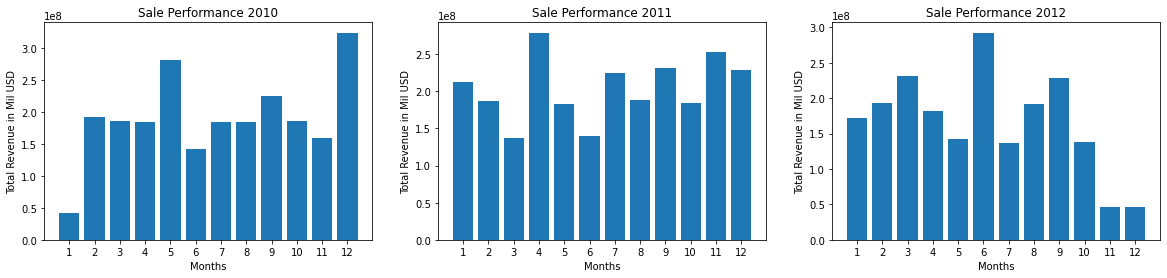

In [252]:
# Plot Monthly Sale Performance over years

# 1. Data Preparation
MonthlySaleYearly = df2.groupby(['Year','Month'])['Weekly_Sales'].sum().rename('Total Revenue').reset_index()

Months = MonthlySaleYearly.Month.unique()
Revenue2010 = MonthlySaleYearly.loc[MonthlySaleYearly['Year']==2010]['Total Revenue']
Revenue2011 = MonthlySaleYearly.loc[MonthlySaleYearly['Year']==2011]['Total Revenue']
Revenue2012 = MonthlySaleYearly.loc[MonthlySaleYearly['Year']==2012]['Total Revenue']

# 2. Create Figure and Axis
fig, ax = plt.subplots(1,3, figsize = (20,4))

# 3. Plot the Data
# 3.1. Plot 2010 Data
ax[0].bar(Months,Revenue2010);
ax[0].set(title = 'Sale Performance 2010',xlabel = 'Months',ylabel = 'Total Revenue in Mil USD');
ax[0].set_xticks(Months);

# 3.2. Plot 2011 Data
ax[1].bar(Months,Revenue2011);
ax[1].set(title = 'Sale Performance 2011',xlabel = 'Months',ylabel = 'Total Revenue in Mil USD');
ax[1].set_xticks(Months);

# 3.3 Plot 2012 Data
ax[2].bar(Months,Revenue2012);
ax[2].set(title = 'Sale Performance 2012',xlabel = 'Months',ylabel = 'Total Revenue in Mil USD');
ax[2].set_xticks(Months);